In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###  Data view

In [30]:
Data = pd.read_csv('GYM.csv')
Data.head()

,Gender,Goal,BMI Category,Exercise Schedule,Meal Plan
0,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
1,Male,fat_burn,Underweight,"Light weightlifting, Yoga, and 2000 steps walking","High-calorie, protein-rich diet: Whole milk, p..."
2,Male,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
3,Male,muscle_gain,Overweight,"High-intensity interval training (HIIT), Cardi...","Low-carb, high-fiber diet: Avocado, grilled fi..."
4,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...


### Check Datatypes

In [31]:
checks = Data.dtypes
checks

Gender               object
Goal                 object
BMI Category         object
Exercise Schedule    object
Meal Plan            object
dtype: object

#### Check Null Values

In [32]:
Number_Nulls = Data.isnull().sum()
print(Number_Nulls)


Gender               0
Goal                 0
BMI Category         0
Exercise Schedule    0
Meal Plan            0
dtype: int64


### Count the number of occurrences for each gender

In [33]:
gender_counts = Data['Gender'].value_counts()

# Print totals
total_men = gender_counts.get('Male', 0)
total_women = gender_counts.get('Female', 0)

print(f"Gender Counts: Total Men = {total_men}, Total Women = {total_women}")

Gender Counts: Total Men = 39320, Total Women = 40680


## Gender counts charts 

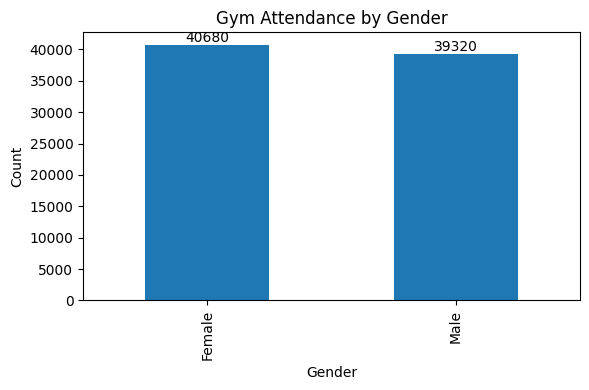

In [34]:
import matplotlib.pyplot as plt

# Count genders
gender_counts = Data['Gender'].value_counts()

# Create a figure with controlled size
plt.figure(figsize=(6, 4))

# Bar chart
ax = gender_counts.plot(kind='bar')

# Titles and labels
plt.title("Gym Attendance by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add values on top of each bar
for i, value in enumerate(gender_counts):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## What is the percentage of each goal category

In [35]:
goal_counts = Data['Goal'].value_counts()

# Calculate percentages
goal_percentages = (goal_counts / len(Data)) * 100

# Extract specific goals (variables must NOT start with %)
muscle_gain_pct = goal_percentages.get('muscle_gain', 0)
fat_burn_pct = goal_percentages.get('fat_burn', 0)

# Print nicely
print(f"Goal Percentages: muscle_gain = {muscle_gain_pct:.2f}%, fat_burn = {fat_burn_pct:.2f}%")


Goal Percentages: muscle_gain = 51.28%, fat_burn = 48.73%


## Goal Category pie chart

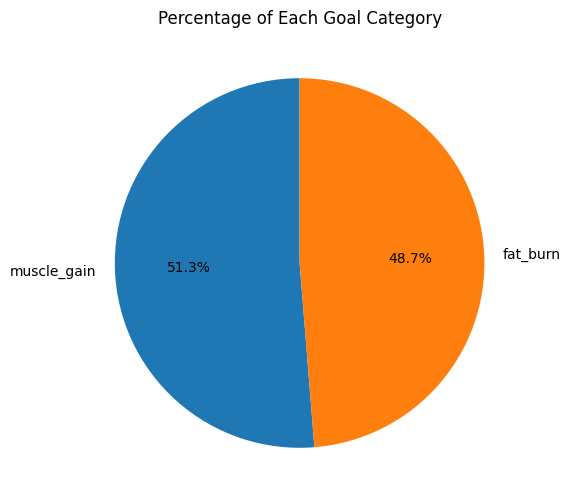

In [36]:
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(goal_percentages, labels=goal_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Each Goal Category")
plt.show()


### Between males and females who has the highest percentage of overweight and normal


In [37]:
bmi_gender_counts= pd.crosstab(Data['Gender'],Data['BMI Category'])
bmi_gender_counts

BMI Category,Normal weight,Obesity,Overweight,Underweight
Gender,,,,
Female,10240,9960,9800,10680
Male,9680,9340,10040,10260


In [38]:
bmi_gender_percent =bmi_gender_counts.div(bmi_gender_counts.sum(axis =1 ),axis =0) * 100
bmi_gender_percent                                       

BMI Category,Normal weight,Obesity,Overweight,Underweight
Gender,,,,
Female,25.172075,24.483776,24.090462,26.253687
Male,24.618515,23.753815,25.534079,26.093591


####  Visualized Bar chat

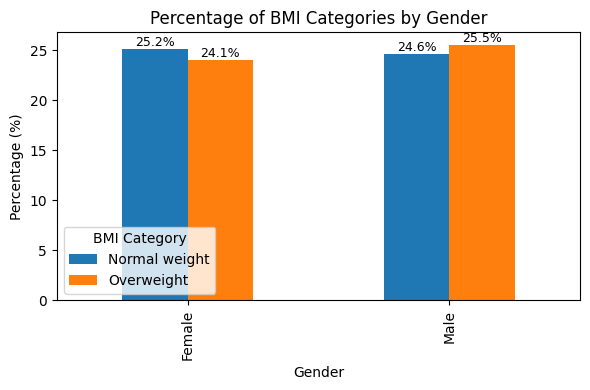

In [39]:
# Plot Normal weight and Overweight percentages by gender
ax = bmi_gender_percent [['Normal weight', 'Overweight']].plot(kind='bar', figsize=(6,4))

plt.title("Percentage of BMI Categories by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.legend(title="BMI Category")
plt.tight_layout()
plt.show()





### Lets inspect unique schedules

In [40]:
Data['Exercise Schedule'].head()

0    Moderate cardio, Strength training, and 5000 s...
1    Light weightlifting, Yoga, and 2000 steps walking
2    Moderate cardio, Strength training, and 5000 s...
3    High-intensity interval training (HIIT), Cardi...
4    Moderate cardio, Strength training, and 5000 s...
Name: Exercise Schedule, dtype: object

### Clean & Split

In [41]:
# Replace "and" with comma for consistency
Data['Exercise_Schedule_Clean'] = Data['Exercise Schedule'].str.replace(" and ", ", ")
Data['Exercise_Schedule_List'] = Data['Exercise_Schedule_Clean'].str.split(", ")

# Explode into separate rows
exercise_expanded = Data.explode('Exercise_Schedule_List')
exercise_expanded.rename(columns={'Exercise_Schedule_List': 'Exercise'}, inplace=True)

# Clean whitespace
exercise_expanded['Exercise'] = exercise_expanded['Exercise'].str.strip()



In [42]:
Data.head()

,Gender,Goal,BMI Category,Exercise Schedule,Meal Plan,Exercise_Schedule_Clean,Exercise_Schedule_List
0,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...,"Moderate cardio, Strength training,, 5000 step...","[Moderate cardio, Strength training,, 5000 ste..."
1,Male,fat_burn,Underweight,"Light weightlifting, Yoga, and 2000 steps walking","High-calorie, protein-rich diet: Whole milk, p...","Light weightlifting, Yoga,, 2000 steps walking","[Light weightlifting, Yoga,, 2000 steps walking]"
2,Male,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...,"Moderate cardio, Strength training,, 5000 step...","[Moderate cardio, Strength training,, 5000 ste..."
3,Male,muscle_gain,Overweight,"High-intensity interval training (HIIT), Cardi...","Low-carb, high-fiber diet: Avocado, grilled fi...","High-intensity interval training (HIIT), Cardi...","[High-intensity interval training (HIIT), Card..."
4,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...,"Moderate cardio, Strength training,, 5000 step...","[Moderate cardio, Strength training,, 5000 ste..."


#### Count Exercises by Gender

In [43]:
exercise_gender_counts = pd.crosstab(exercise_expanded['Exercise'], exercise_expanded['Gender'])
print(exercise_gender_counts)

Gender                                   Female   Male
Exercise                                              
10000 steps walking                        9960   9340
2000 steps walking                        10680  10260
5000 steps walking                        10240   9680
8000 steps walking                         9800  10040
Cardio,                                    9800  10040
High-intensity interval training (HIIT)    9800  10040
Light weightlifting                       10680  10260
Low-impact cardio                          9960   9340
Moderate cardio                           10240   9680
Strength training,                        10240   9680
Swimming,                                  9960   9340
Yoga,                                     10680  10260


### Visualize in bar graph

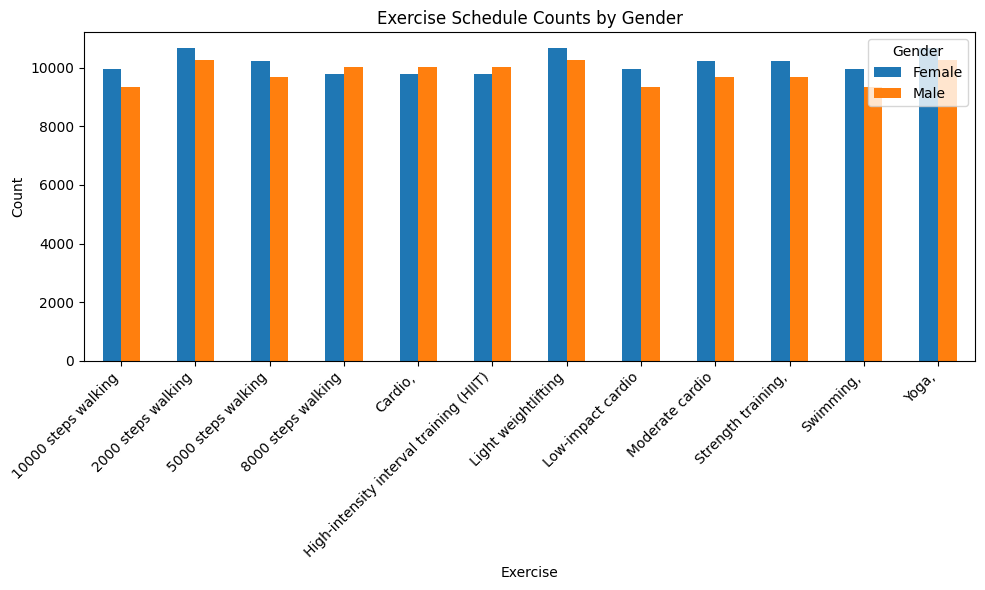

In [44]:
exercise_gender_counts.plot(kind='bar',figsize=(10,6))

plt.title("Exercise Schedule Counts by Gender")
plt.xlabel('Exercise')
plt.ylabel('Count')

plt.xticks(rotation=45,ha='right')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()
        

### Count excercise by Goal

In [45]:
excercise_goal_counts =pd.crosstab(exercise_expanded['Exercise'], exercise_expanded['Goal'])
excercise_goal_counts

Goal,fat_burn,muscle_gain
Exercise,,
10000 steps walking,9460,9840
2000 steps walking,10480,10460
5000 steps walking,9600,10320
8000 steps walking,9440,10400
"Cardio,",9440,10400
High-intensity interval training (HIIT),9440,10400
Light weightlifting,10480,10460
Low-impact cardio,9460,9840
Moderate cardio,9600,10320


#####  Visualise in a bar graph

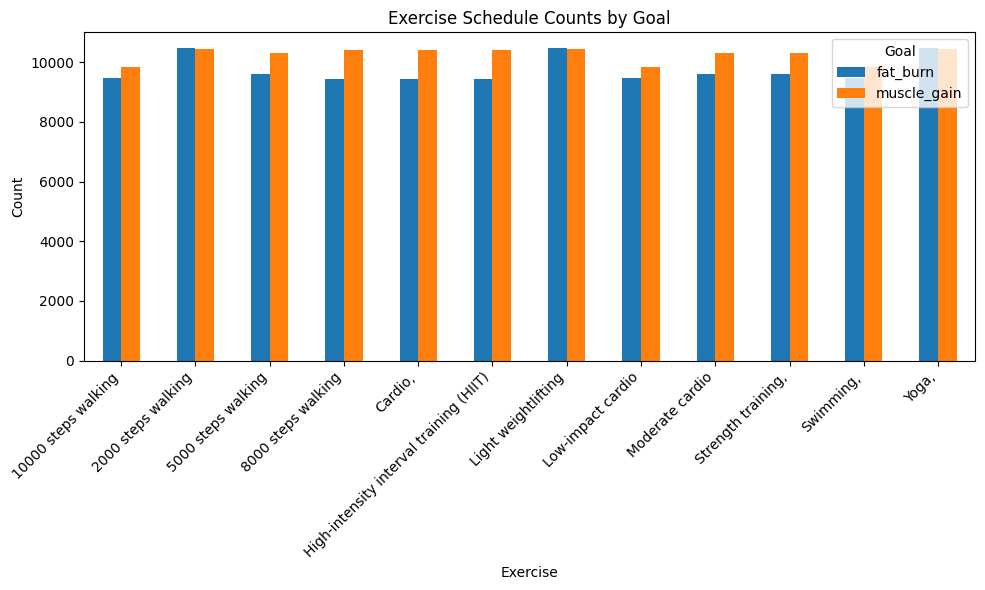

In [46]:
excercise_goal_counts.plot(kind='bar',figsize=(10,6))
plt.title("Exercise Schedule Counts by Goal")
plt.xlabel("Exercise")
plt.ylabel("Count")
plt.xticks(rotation=45, ha ='right')
plt.legend(title="Goal")
plt.tight_layout()
plt.show()
          

### Count excercise by Gender & Goal 

In [47]:
exercise_gender_goal = pd.crosstab(
    [exercise_expanded['Exercise']], 
    [exercise_expanded['Gender'], exercise_expanded['Goal']]
)

exercise_gender_goal


Gender                                    Female                 Male  \
Goal                                    fat_burn muscle_gain fat_burn   
Exercise                                                                
10000 steps walking                         4940        5020     4520   
2000 steps walking                          5480        5200     5000   
5000 steps walking                          4800        5440     4800   
8000 steps walking                          4860        4940     4580   
Cardio,                                     4860        4940     4580   
High-intensity interval training (HIIT)     4860        4940     4580   
Light weightlifting                         5480        5200     5000   
Low-impact cardio                           4940        5020     4520   
Moderate cardio                             4800        5440     4800   
Strength training,                          4800        5440     4800   
Swimming,                                   4940        5020     4520   
Yoga,                                       5480        5200     5000   

Gender                                               
Goal                                    muscle_gain  
Exercise                                             
10000 steps walking                            4820  
2000 steps walking                             5260  
5000 steps walking                             4880  
8000 steps walking                             5460  
Cardio,                                        5460  
High-intensity interval training (HIIT)        5460  
Light weightlifting                            5260  
Low-impact cardio                              4820  
Moderate cardio                                4880  
Strength training,                             4880  
Swimming,                                      4820  
Yoga,                                          5260

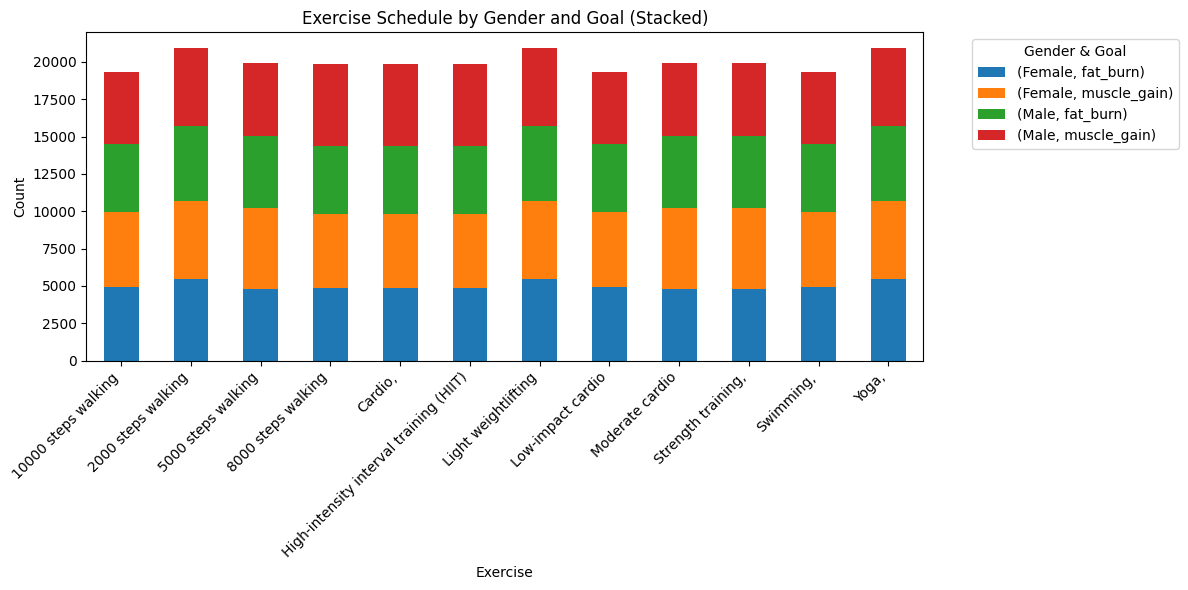

In [48]:
exercise_gender_goal.plot(kind='bar', stacked =True ,figsize=(12,6))
plt.title("Exercise Schedule by Gender and Goal (Stacked)")
plt.xlabel("Exercise")
plt.ylabel("Count")
plt.xticks(rotation=45, ha ='right')
plt.legend(title="Gender & Goal",bbox_to_anchor=(1.05,1),loc ='upper left')
plt.tight_layout()
plt.show()

# Heatmap (to spot patterns across all categories)

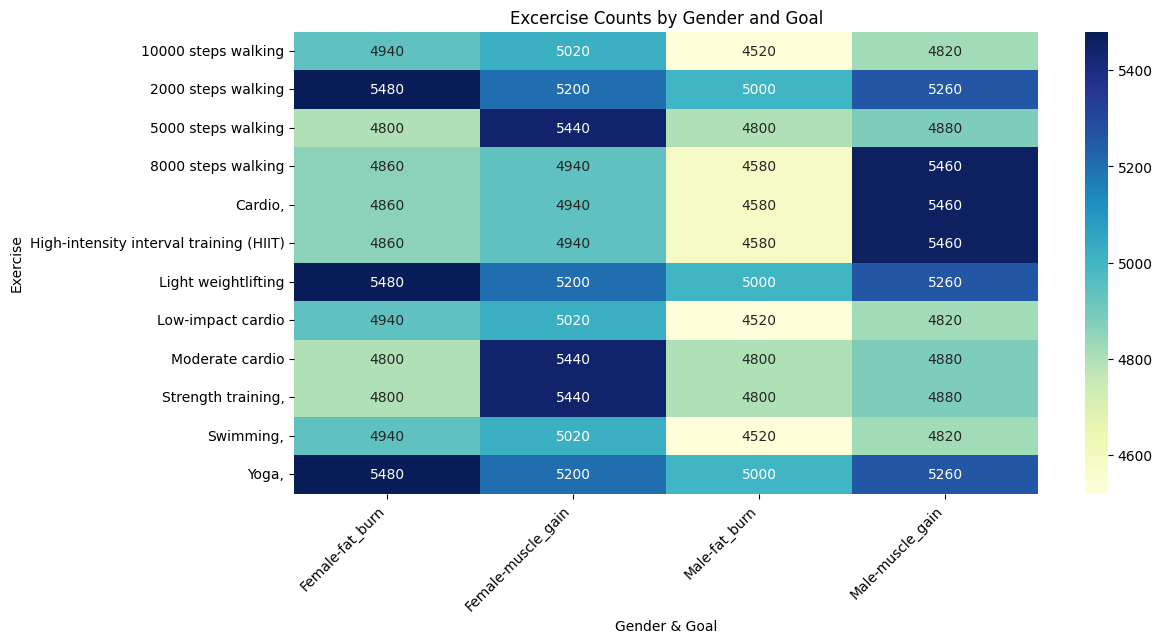

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(exercise_gender_goal, annot = True, fmt ="d", cmap ="YlGnBu")
plt.title("Excercise Counts by Gender and Goal")
plt.xlabel("Gender & Goal")
plt.ylabel("Exercise")
plt.xticks(rotation =45, ha ='right')
plt.show()

#### Let's restructure the data for better storytelling with melt and plot with seaborn

In [67]:
# Crosstab
exercise_gender_goal = pd.crosstab(
    exercise_expanded["Exercise"], 
    [exercise_expanded["Gender"], exercise_expanded["Goal"]]
)

# Reset index so Exercise Schedule becomes a column
df_reset = exercise_gender_goal.reset_index()

# Melt into tidy format (note: use "Exercise Schedule" here)
melted = df_reset.melt(
    id_vars="Exercise", 
    value_name="Count"
)

# Split MultiIndex (Gender, Goal) into separate columns
melted[["Gender", "Goal"]] = pd.DataFrame(melted["variable"].tolist(), index=melted.index)

# Drop the old MultiIndex column
melted = melted.drop(columns="variable")

print(melted.head())





KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Exercise']"

In [68]:
print(df_reset.columns.tolist())



[('Exercise', ''), ('Female', 'fat_burn'), ('Female', 'muscle_gain'), ('Male', 'fat_burn'), ('Male', 'muscle_gain')]
